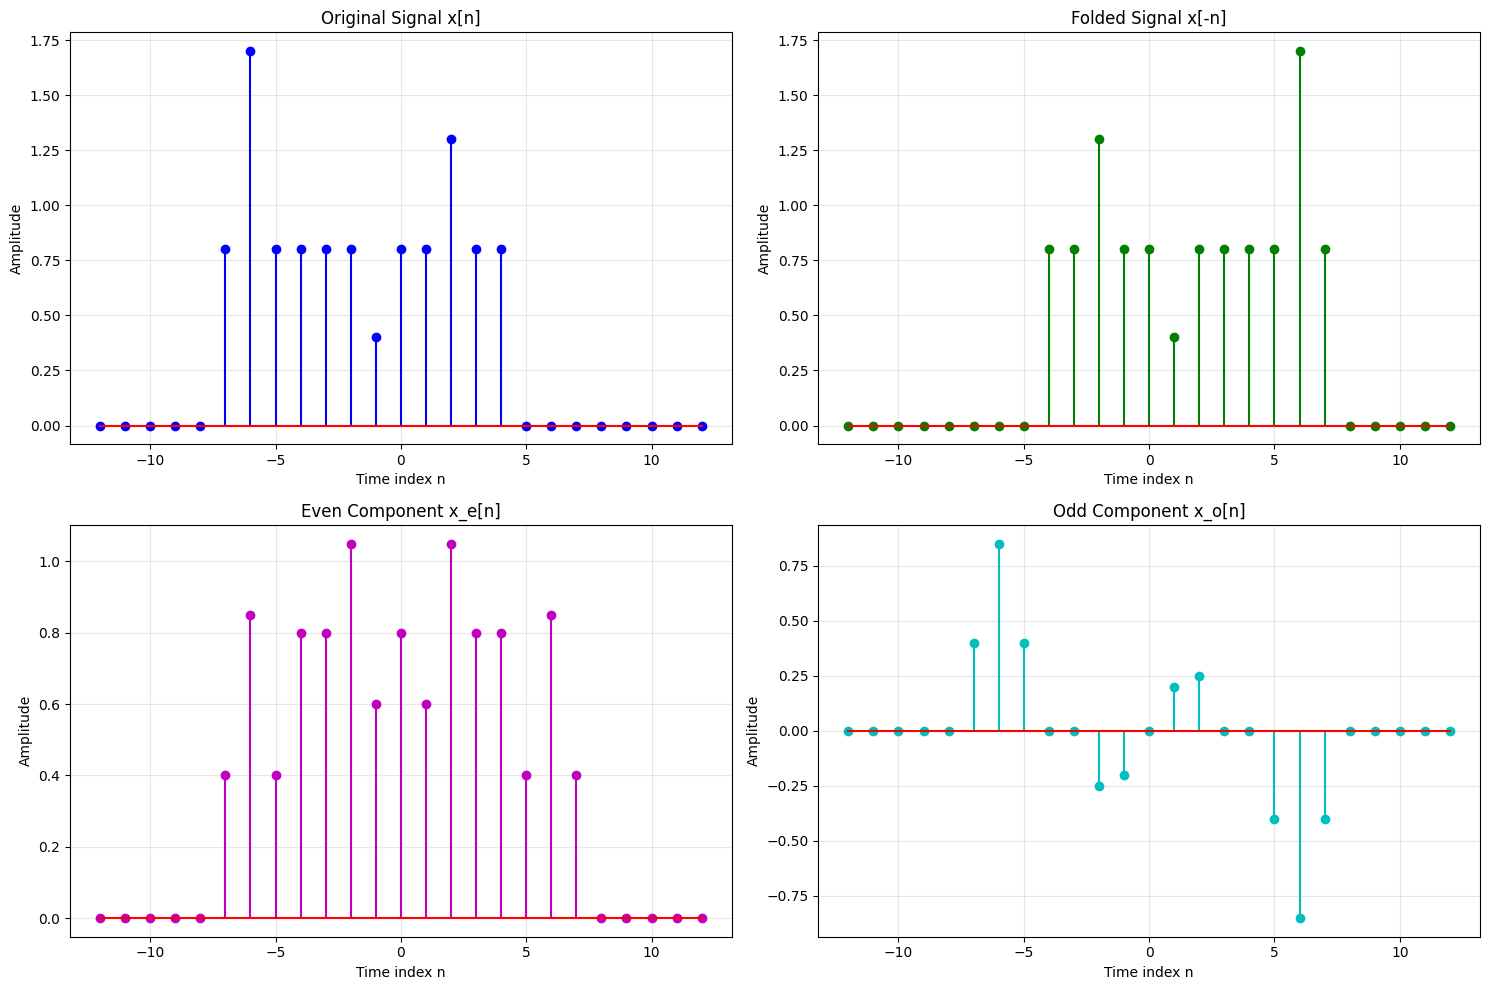

Maximum reconstruction error: 5.55e-17
Even component symmetry check: True
Odd component symmetry check: True


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create a figure for all our plots
plt.figure(figsize=(15, 10))

# Define our signal 
n = np.arange(-12, 13)  
x = np.zeros_like(n, dtype=float)

# New non-symmetric signal values 
x[(n >= -7) & (n <= 4)] = 0.8    
x[n == -6] = 1.7                 
x[n == 2] = 1.3                 
x[n == -1] = 0.4                 
# Plot the original signal
plt.subplot(2, 2, 1)
plt.stem(n, x, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.title('Original Signal x[n]')
plt.xlabel('Time index n')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)

# Folded signal x[-n]
x_folded = x[::-1]

plt.subplot(2, 2, 2)
plt.stem(n, x_folded, linefmt='g-', markerfmt='go', basefmt='r-')
plt.title('Folded Signal x[-n]')
plt.xlabel('Time index n')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)

# Even component
x_even = (x + x_folded) / 2
plt.subplot(2, 2, 3)
plt.stem(n, x_even, linefmt='m-', markerfmt='mo', basefmt='r-')
plt.title('Even Component x_e[n]')
plt.xlabel('Time index n')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)

# Odd component
x_odd = (x - x_folded) / 2
plt.subplot(2, 2, 4)
plt.stem(n, x_odd, linefmt='c-', markerfmt='co', basefmt='r-')
plt.title('Odd Component x_o[n]')
plt.xlabel('Time index n')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Reconstruction check
x_reconstructed = x_even + x_odd
reconstruction_error = np.max(np.abs(x - x_reconstructed))
print(f"Maximum reconstruction error: {reconstruction_error:.2e}")

# Symmetry verification
print(f"Even component symmetry check: {np.allclose(x_even, x_even[::-1])}")
print(f"Odd component symmetry check: {np.allclose(x_odd, -x_odd[::-1])}")
